# PCAの一連の流れをnumpyを使って理解
PCAの一連の流れは  
1.d次元データセットを標準化(sklearnのStandardScaler)  
2.分散共分散行列(covariacne matrix)を作成(numpyのnp.cov)  
3.共分散行列を固有値と固有ベクトルに分解(numpyのnp,linalg.eig)  
4.最も大きいk個の固有値に対応するk個の固有ベクトルを選択（この流れは可視化のために便宜上k=2にしている）  
5.上位k個の固有ベクトルから射影行列Wを作成(numpyのnp.hstackで固有ベクトルを連結)  
6.射影行列Wを使ってd次元データセットを変換して,新しいk次元の特徴量を手に入れる  

## 1.d次元データセットを標準化(sklearnのStandardScaler)  

In [1]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X=df_wine.iloc[:,1:]
y=df_wine.iloc[:,0]

sc=StandardScaler()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.fit_transform(X_test)

## 2.分散共分散行列(covariacne matrix)を作成(numpyのnp.cov)  
## 3.共分散行列を固有値と固有ベクトルに分解(numpyのnp,linalg.eig) 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
cov_mat=np.cov(X_train_std.T)
eigen_vals,eigen_vecs=np.linalg.eig(cov_mat)

## 4.最も大きいk個の固有値に対応するk個の固有ベクトルを選択（この流れは可視化のために便宜上k=2にしている） 

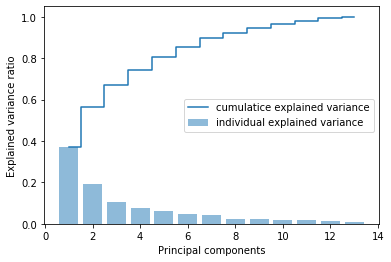

In [4]:
# 固有値の合計を求める
tot=sum(eigen_vals)
# 固有値（新しい基底に対するデータの分散）が大きい順に並べる
var_exp=[(i/tot) for i in sorted(eigen_vals,reverse=True)]
# 累積和を求める
cum_var_exp=np.cumsum(var_exp)
plt.bar(range(1,X.shape[1]+1),var_exp,alpha=0.5,align='center',label='individual explained variance')
plt.step(range(1,X.shape[1]+1),cum_var_exp,where='mid',label='cumulatice explained variance')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')
plt.show()

## 5.上位k個の固有ベクトルから射影行列Wを作成(numpyのnp.hstackで固有ベクトルを連結)  

In [5]:
# 固有値と固有ベクトルの組のタプルを作成。eigen_vecの各列が固有ベクトルに対応する
eigen_pairs=[(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]
# 固有値（分散）が大きい順に並び替える
eigen_pairs.sort(reverse=True)
# 射影行列を作成。それぞれの固有ベクトルを列とする行列
# eigen_pairs[0][1]で固有ベクトルを表し[:,np.newaxis]で列ベクトルに変換している
w=np.hstack((eigen_pairs[0][1][:,np.newaxis],eigen_pairs[1][1][:,np.newaxis]))
w

array([[ 0.12959991,  0.49807323],
       [-0.24464064,  0.23168482],
       [-0.01018912,  0.31496874],
       [-0.24051579, -0.02321825],
       [ 0.12649451,  0.25841951],
       [ 0.38944115,  0.1006849 ],
       [ 0.42757808,  0.02097952],
       [-0.30505669,  0.0399057 ],
       [ 0.30775255,  0.06746036],
       [-0.11027186,  0.53087111],
       [ 0.30710508, -0.27161729],
       [ 0.37636185, -0.16071181],
       [ 0.2811085 ,  0.36547344]])

## 6.射影行列Wを使ってd次元データセットを変換して,新しいk次元の特徴量を手に入れる  

In [11]:
X_train_pca=X_train_std.dot(w)
print(X_train.shape)
print(X_train_pca.shape)

(142, 13)
(142, 2)


## 新しい基底で取ったときの特徴量の様子を可視化
今回は可視化のためにわざわざ2個の特徴量にした

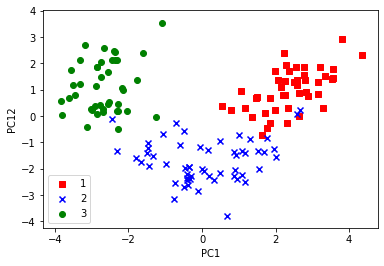

In [8]:
colors=['r','b','g']
markers=['s','x','o']

for l,c,m in zip(np.unique(y_train),colors,markers):
    plt.scatter(X_train_pca[y_train==l,0],X_train_pca[y_train==l,1],c=c,marker=m,label=l)

plt.xlabel('PC1')
plt.ylabel('PC12')
plt.legend(loc='lower left')
plt.show()